## Unit 2 Lesson 1.8, Challenge: Preparing a dataset for the modeling




##### Stages of model preparation: 

Creating a good model: excluding irrelevant information 
Best guess on the underlying processes that led to the outcomes we observe. 

Formulating a research question: 
Find an outcome of interest, a particular variable that we want to understand. Continous outcomes.
Statistical model: mathematical expression of research question 

Two continous variables: 
Correlation coefficient: r
two-dimensional outliners

Types of relations for different types of variables

Feature engineering 

with clean dataset, and specific outcome variable. 
Types of continous variables 

Combining highly-correlated variables 

Dealing with non-normality 

Principal component analysis 



In [1]:
import random
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv('./Amesterdamdata.csv')

In [3]:
df.head()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,23,100.0,78.26,43,3x25,14761,39.13,0.0,2009
1,31,100.0,77.42,58,3x25,12139,16.13,0.0,2009
2,21,100.0,66.67,52,3x25,5082,47.62,0.0,2009
3,15,100.0,60.00,93,3x25,3712,33.33,0.0,2009
4,12,100.0,91.67,83,3x25,19837,41.67,0.0,2009


In [4]:
df.dtypes

num_connections                   int64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                    int64
type_of_connection               object
annual_consume                    int64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                              int64
dtype: object

In [5]:
df.num_connections.unique()

array([ 23,  31,  21,  15,  12,  18,  11,  14,  27,  19,  33,  13,  17,
        32,  10,  26,  20,  16,  28,  22,  37,  63,  55,  24,  36,  45,
        44,  30,  42,  47,  52,  91,  38, 224,  40,  48,  90,  29,  25,
        41,  50,  43, 121, 103,  64,  53,  74, 176,  75,  59,  70,  77,
        95,  66,  35, 102,  54,  39,  71,  34,  56,  78,  46,  67,  61,
        68,  69, 310,  97, 105, 137, 161, 300, 123, 158,  94,  51,  60,
        58, 219, 110,  49, 120,  96, 243,  79, 101, 115,  73,  84,  92,
        83, 324, 195, 143, 131,  72,  65,  80,  99,  88,  62,  76, 132,
        57,  87,  93,  81, 127, 100, 261, 521, 157, 118,  85,  82, 164,
       125, 128,  86, 112, 167, 150, 122, 192, 182, 133, 107, 136, 106,
       172, 114, 185, 199, 108,  89,  98, 117, 166, 181, 119, 109, 254,
       104, 138, 130, 116, 155, 156, 252, 124, 154, 160, 174, 285, 431,
       148, 194, 191, 135, 188, 111, 134, 129, 152, 149, 142, 153, 206,
       236, 212, 113, 216, 313, 302, 220, 271, 141, 262, 532, 16

### Exploring the dataset

In [6]:
df.type_of_connection.value_counts()

1x25    74563
3x25    52273
1x35    26073
1x50     1829
3x35      183
OBK       163
3x63      147
3x80      140
1x6       124
3x50       61
1x10        1
Name: type_of_connection, dtype: int64

In [7]:
df_2009 = df.loc[
    (df['year']== 2009) & (df['delivery_perc'] == float(100.0)),
['num_connections', 'annual_consume']
]

In [8]:
df_2009.head()

,num_connections,annual_consume
0,23,14761
1,31,12139
2,21,5082
3,15,3712
4,12,19837


In [9]:
corrmat = df.corr()
print(corrmat)

                              num_connections  delivery_perc  \
num_connections                      1.000000       0.000956   
delivery_perc                        0.000956       1.000000   
perc_of_active_connections          -0.070453       0.030962   
type_conn_perc                      -0.074439       0.077569   
annual_consume                      -0.041911      -0.021306   
annual_consume_lowtarif_perc        -0.013649      -0.136732   
smartmeter_perc                      0.007894      -0.133413   
year                                 0.032275      -0.155234   

                              perc_of_active_connections  type_conn_perc  \
num_connections                                -0.070453       -0.074439   
delivery_perc                                   0.030962        0.077569   
perc_of_active_connections                      1.000000        0.178198   
type_conn_perc                                  0.178198        1.000000   
annual_consume                             

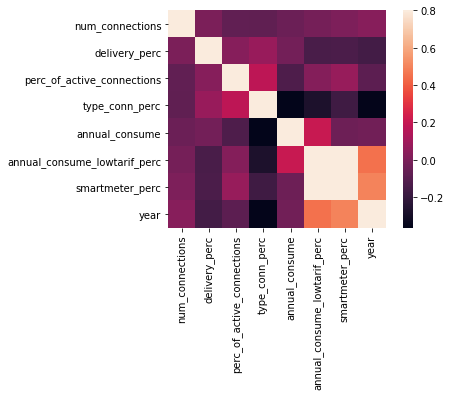

In [10]:
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Continous Variables

In [11]:
df_continous = df[['num_connections', 'annual_consume', 'smartmeter_perc', 'delivery_perc', 'perc_of_active_connections', 
                       'annual_consume_lowtarif_perc']]

In [12]:
df_continous.head()

,num_connections,annual_consume,smartmeter_perc,delivery_perc,perc_of_active_connections,annual_consume_lowtarif_perc
0,23,14761,0.0,100.0,78.26,39.13
1,31,12139,0.0,100.0,77.42,16.13
2,21,5082,0.0,100.0,66.67,47.62
3,15,3712,0.0,100.0,60.00,33.33
4,12,19837,0.0,100.0,91.67,41.67


In [13]:
corrmat = df_continous.corr()


In [14]:
corrmat.head()

,num_connections,annual_consume,smartmeter_perc,delivery_perc,perc_of_active_connections,annual_consume_lowtarif_perc
num_connections,1.000000,-0.041911,0.007894,0.000956,-0.070453,-0.013649
annual_consume,-0.041911,1.000000,-0.038121,-0.021306,-0.124863,0.205573
smartmeter_perc,0.007894,-0.038121,1.000000,-0.133413,0.076941,0.925871
delivery_perc,0.000956,-0.021306,-0.133413,1.000000,0.030962,-0.136732
perc_of_active_connections,-0.070453,-0.124863,0.076941,0.030962,1.000000,0.025688


                              num_connections  annual_consume  \
num_connections                      1.000000       -0.041911   
annual_consume                      -0.041911        1.000000   
smartmeter_perc                      0.007894       -0.038121   
delivery_perc                        0.000956       -0.021306   
perc_of_active_connections          -0.070453       -0.124863   
annual_consume_lowtarif_perc        -0.013649        0.205573   

                              smartmeter_perc  delivery_perc  \
num_connections                      0.007894       0.000956   
annual_consume                      -0.038121      -0.021306   
smartmeter_perc                      1.000000      -0.133413   
delivery_perc                       -0.133413       1.000000   
perc_of_active_connections           0.076941       0.030962   
annual_consume_lowtarif_perc         0.925871      -0.136732   

                              perc_of_active_connections  \
num_connections                    

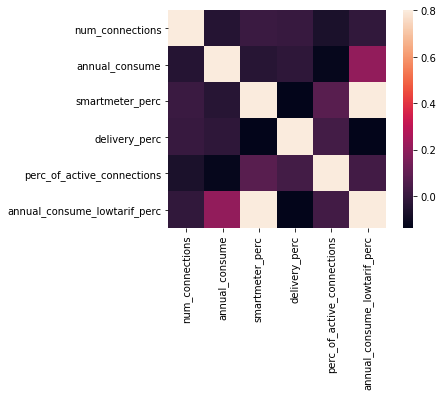

In [15]:
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Continous and categorical pair

In [16]:
df_years = df.loc[
    ((df['year'] == 2009) | (df['year'] == 2014) | (df['year'] == 2018)), 
    ['year','num_connections', 'annual_consume', 'smartmeter_perc', 'delivery_perc', 'perc_of_active_connections', 
                       'annual_consume_lowtarif_perc']
]

In [17]:
df_years.head()

,year,num_connections,annual_consume,smartmeter_perc,delivery_perc,perc_of_active_connections,annual_consume_lowtarif_perc
0,2009,23,14761,0.0,100.0,78.26,39.13
1,2009,31,12139,0.0,100.0,77.42,16.13
2,2009,21,5082,0.0,100.0,66.67,47.62
3,2009,15,3712,0.0,100.0,60.00,33.33
4,2009,12,19837,0.0,100.0,91.67,41.67


In [18]:
df_long = df_years
df_long.head()
df_long = df_long.drop(['annual_consume'], axis=1)
df_long = df_long.drop(['num_connections'], axis=1)

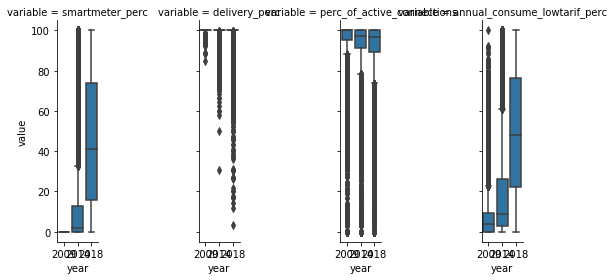

In [19]:
df_long = pd.melt(df_long, id_vars=['year'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "year", "value")
plt.show()

### Two Categorical variables

In [20]:
df_2cat = df.loc[
    ['year','type_of_connection']
]


KeyError: "None of [['year', 'type_of_connection']] are in the [index]"

### Feature Engineering 


In [21]:
features1 = pd.get_dummies(df['delivery_perc'])

features1['onehundred'] = np.where((df['delivery_perc'].isin([100])), 1, 0)

print(pd.crosstab(features1['onehundred'], df['delivery_perc']))

delivery_perc  3.26    5.43    12.00   14.29   16.67   17.39   17.86   19.05   \
onehundred                                                                      
0                   2       1       2       1       2       3       2       1   
1                   0       0       0       0       0       0       0       0   

delivery_perc  20.00   21.74    ...    99.51   99.53   99.61   99.62   99.63   \
onehundred                      ...                                             
0                   2       2   ...         1       2       1       3       2   
1                   0       0   ...         0       0       0       0       0   

delivery_perc  99.65   99.73   99.76   99.81   100.00  
onehundred                                             
0                   1       1       3       2       0  
1                   0       0       0       0  146448  

[2 rows x 573 columns]


In [22]:
features1['onehundred_perc'] = np.where(df['delivery_perc'] == 100, 1, 0)

print(df['delivery_perc'].groupby(features1['onehundred_perc']).describe())

                    count        mean       std     min     25%     50%  \
onehundred_perc                                                           
0                  9109.0   91.017752  8.830124    3.26   88.89   93.75   
1                146448.0  100.000000  0.000000  100.00  100.00  100.00   

                    75%     max  
onehundred_perc                  
0                 96.15   99.81  
1                100.00  100.00  


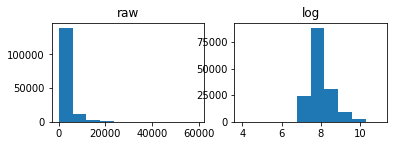

In [34]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['annual_consume'].dropna())
plt.title('raw')

fig.add_subplot(222)
plt.hist(np.log(df['annual_consume'].dropna()))
plt.title('log')


plt.show()